In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [9]:
df.dropna().isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 308, dtype: bool

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

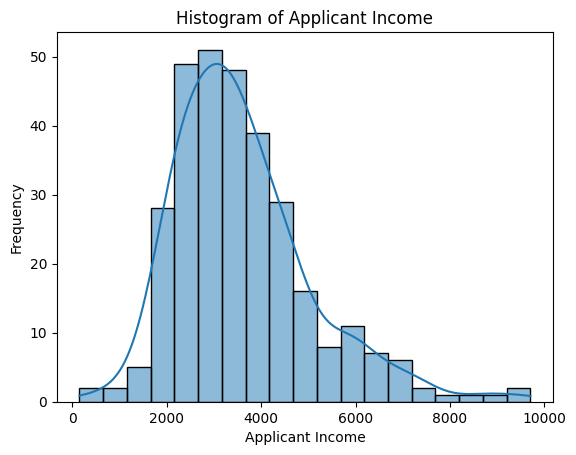

In [16]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

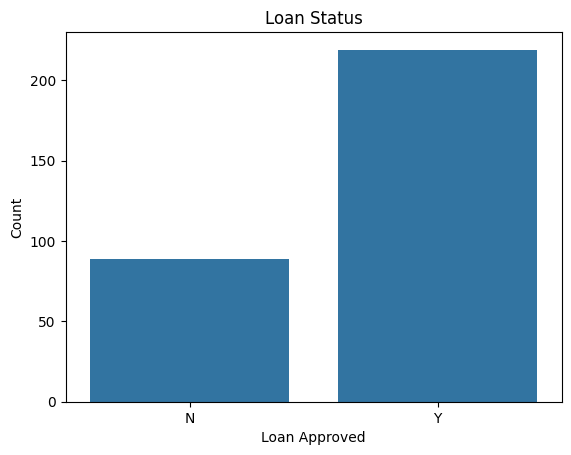

In [17]:
sns.countplot(x="Loan_Status", data = df)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()


In [18]:
df.groupby("Education")["LoanAmount"].mean().sort_values(ascending= True)

Education
Not Graduate    102.531646
Graduate        105.344978
Name: LoanAmount, dtype: float64

In [19]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


In [20]:
avg_loan_amount_by_education = df.groupby("Education", as_index=False)["LoanAmount"].mean()

In [21]:
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


C:\Users\Prakrity\AppData\Local\Temp\ipykernel_2028\2115132713.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ="Education", y="LoanAmount", data = avg_loan_amount_by_education, palette="husl")


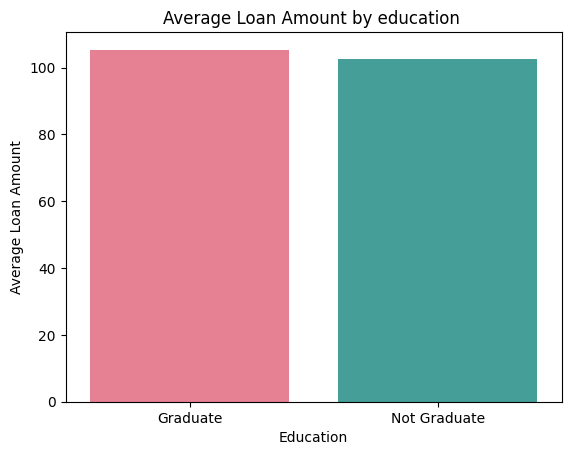

In [22]:
sns.barplot(x ="Education", y="LoanAmount", data = avg_loan_amount_by_education, palette="husl")
plt.title("Average Loan Amount by education ")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

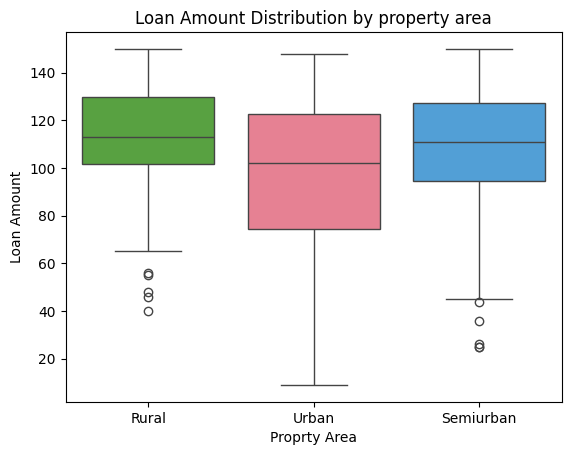

In [23]:
sns.boxplot(x="Property_Area", y="LoanAmount", data=df, hue="Property_Area", palette="husl", hue_order=["Urban", "Rural", "Semiurban"])
plt.title("Loan Amount Distribution by property area")
plt.xlabel("Proprty Area")
plt.ylabel("Loan Amount")
plt.show()

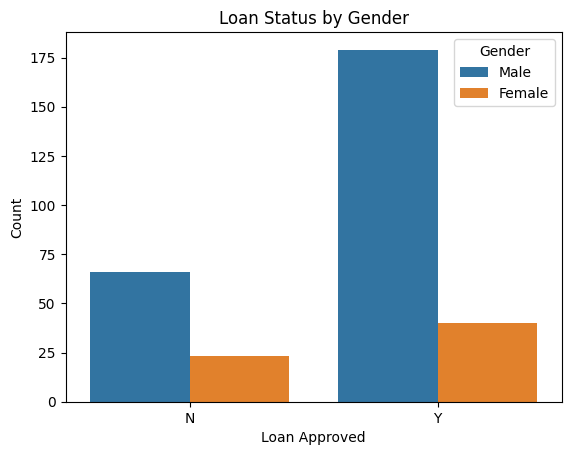

In [24]:
sns.countplot(x = "Loan_Status", hue="Gender", data= df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [25]:
df["Gender"].value_counts()

Gender
Male      245
Female     63
Name: count, dtype: int64

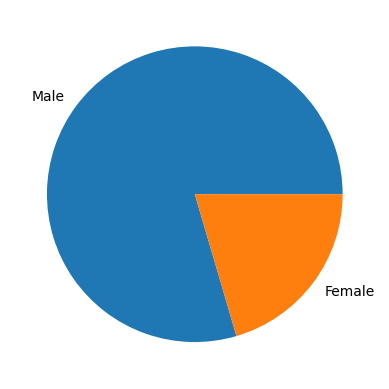

In [26]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [27]:
loan_status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

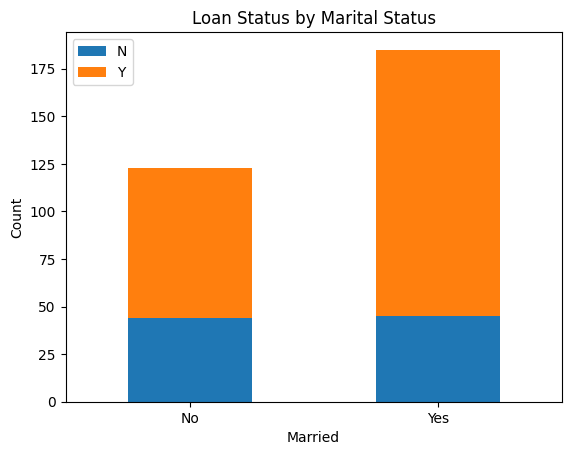

In [28]:
loan_status_by_married.plot(kind="bar", stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation =0)
plt.show()

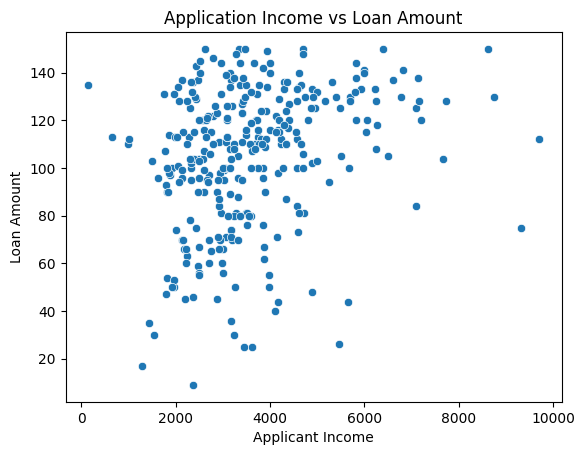

In [29]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data = df)
plt.title("Application Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [30]:
numeric_df = df.select_dtypes(include=["int64","float64"])

In [31]:
numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [32]:
correlational_matrix = numeric_df.corr()

In [33]:
correlational_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


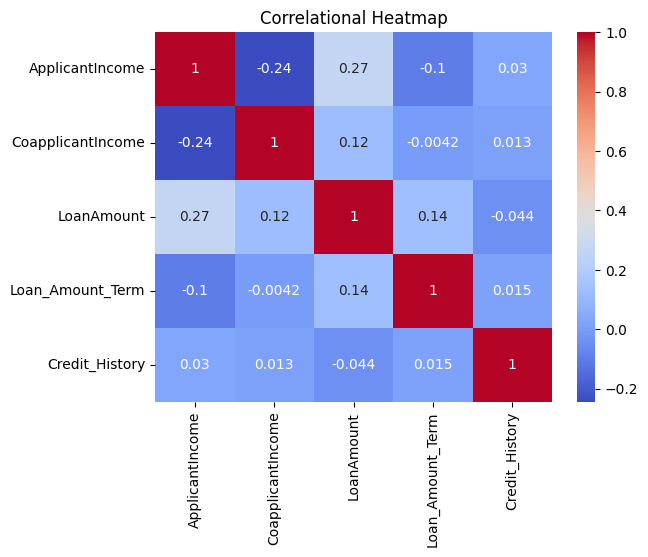

In [34]:
sns.heatmap(correlational_matrix, annot=True, cmap="coolwarm")
plt.title("Correlational Heatmap")
plt.show()

In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
avg_loan_amount_termm_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()

In [37]:
avg_loan_amount_termm_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


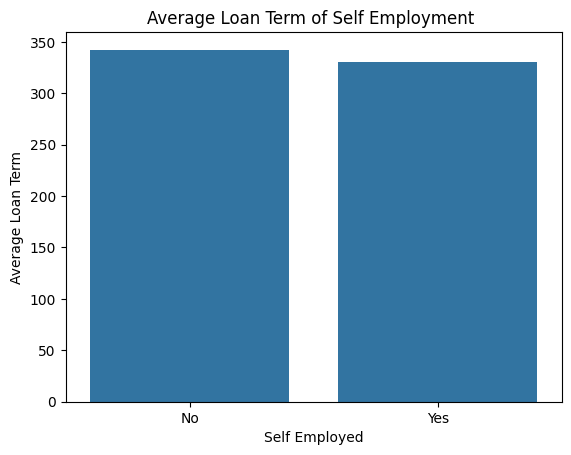

In [38]:
sns.barplot(x="Self_Employed", y= "Loan_Amount_Term", data = avg_loan_amount_termm_by_employed)
plt.title("Average Loan Term of Self Employment ")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()

In [39]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [40]:
df["Credit_History"].unique()

array([1., 0.])

In [41]:
X = df[["Married","ApplicantIncome","Education","LoanAmount","Credit_History"]]

In [42]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [43]:
y =df[["Loan_Status"]]

In [44]:
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [45]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [46]:
y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])

C:\Users\Prakrity\AppData\Local\Temp\ipykernel_2028\688273105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])


In [47]:
y # y is 1 n is 0

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [48]:
labelencoder.classes_


array(['N', 'Y'], dtype=object)

In [49]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [50]:
type(X["Credit_History"][0])

numpy.float64

In [51]:
X["Married"] = labelencoder.fit_transform(X["Married"])

C:\Users\Prakrity\AppData\Local\Temp\ipykernel_2028\221913637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = labelencoder.fit_transform(X["Married"])


In [52]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [53]:
X["Education"] = labelencoder.fit_transform(X["Education"])

C:\Users\Prakrity\AppData\Local\Temp\ipykernel_2028\2197850253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = labelencoder.fit_transform(X["Education"])


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X = scaler.fit_transform(X)

In [56]:
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [57]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
def modelperformace(predictions):
    print("Accuracy score in model is {}", format(accuracy_score(y_test, predictions)))

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


c:\Users\Prakrity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [63]:
log_predictions = log_model.predict(X_test)

In [64]:
modelperformace(log_predictions)

Accuracy score in model is {} 0.8870967741935484


In [65]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors": [3,5,7],
              "weights": ["uniform","distance"]}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [66]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [67]:
knpreds = gridkn.predict(X_test)

In [68]:
modelperformace(knpreds)

Accuracy score in model is {} 0.8387096774193549


In [69]:
from sklearn.svm import SVC

In [70]:
svm = SVC()
param_grid_svc = {"C": [0.04,0.01,0.02,0.1,0.5],"kernel" :["linear","rcb","poly"]}

In [71]:
gridsvc = GridSearchCV(svm, param_grid_svc)

In [72]:
gridsvc.fit(X_train, y_train.values.ravel())

c:\Users\Prakrity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Prakrity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Prakrity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Prakrity\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.04, 0.01, 0.02, 0.1, 0.5],
                         'kernel': ['linear', 'rcb', 'poly']})

In [73]:
gridsvc.best_params_

{'C': 0.04, 'kernel': 'linear'}

In [74]:
pred_svc = gridsvc.predict(X_test)
modelperformace(pred_svc)

Accuracy score in model is {} 0.8870967741935484


In [75]:
joblib.dump(gridsvc, "model.pkl")

['model.pkl']

In [77]:
X # 0 3500 1 100 1

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [78]:
import joblib

testmodel = joblib.load("model.pkl")

In [79]:
testmodel.predict([[0,3500,1,100,1]])[0]

np.int64(1)